In [ ]:
!pip install ipyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import ipyplot
from tensorflow.keras.layers import*
from tensorflow.keras.models import*
from tensorflow.keras.losses import*
from tensorflow.keras.optimizers import*
import os
import math
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=0qAWKs7-9joG833lyDWwPxgoXYN%2Fzjrc4fTClVwTSGM'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/usr/bin/open: 882: www-browser: not found
/usr/bin/open: 882: links2: not found
/usr/bin/open: 882: elinks: not found
/usr/bin/open: 882: links: not found
/usr/bin/open: 882: lynx: not found
/usr/bin/open: 882: w3m: not found
xdg-open: no method available for opening

In [ ]:
training_label_path_256 = '/content/gdrive/My Drive/labels_train_256.npy'
training_file_path_256 = '/content/gdrive/My Drive/myarr_train_256.npy'
val_file_path_256 = '/content/gdrive/My Drive/myarr_test_256.npy'
val_label_path_256 = '/content/gdrive/My Drive/labels_test_256.npy'

training_images_256,training_labels_256,val_images_256,val_labels_256=np.load(training_file_path_256),np.load(training_label_path_256),np.load(val_file_path_256),np.load(val_label_path_256)
print("shape of training data_256",training_images_256.shape,",",training_labels_256.shape)
print("shape of val data_256",val_images_256.shape,",",val_labels_256.shape)

training_images_256, training_labels_256 = shuffle(training_images_256, training_labels_256)
val_images_256,val_labels_256 = shuffle(val_images_256,val_labels_256)



shape of training data_256 (8000, 256, 256, 3) , (8000, 5)
shape of val data_256 (2000, 256, 256, 3) , (2000, 5)


In [ ]:
testing_file_path_256 = '/content/gdrive/My Drive/test_set/myarr_testnew_256.npy'
testing_label_path_256 = '/content/gdrive/My Drive/test_set/newlabels_test_256 (0a8127f8).npy'

testing_images_256,testing_labels_256=np.load(testing_file_path_256),np.load(testing_label_path_256)
print("shape of testing data",testing_images_256.shape,",",testing_labels_256.shape)
testing_images_256, testing_labels_256 = shuffle(testing_images_256, testing_labels_256)

shape of testing data (624, 256, 256, 3) , (624, 5)


In [ ]:
training_label_path_224 = '/content/gdrive/My Drive/internship/labels_train.npy'
training_file_path_224 = '/content/gdrive/My Drive/myarr_train.npy'
val_file_path_224 = '/content/gdrive/My Drive/myarr_test.npy'
val_label_path_224 = '/content/gdrive/My Drive/internship/labels_test.npy'

training_images_224,training_labels_224,val_images_224,val_labels_224=np.load(training_file_path_224),np.load(training_label_path_224),np.load(val_file_path_224),np.load(val_label_path_224)
print("shape of training data",training_images_224.shape,",",training_labels_224.shape)
print("shape of val data",val_images_224.shape,",",val_labels_224.shape)

training_images_224, training_labels_224 = shuffle(training_images_224, training_labels_224)
val_images_224,val_labels_224 = shuffle(val_images_224,val_labels_224)



shape of training data (8000, 224, 224, 3) , (8000, 5)
shape of val data (2000, 224, 224, 3) , (2000, 5)


In [ ]:
testing_file_path_224 = '/content/gdrive/My Drive/org/arr_prep_messidor_testnew.npy'
testing_label_path_224 = '/content/gdrive/My Drive/org/labels_prep_messidor_testnwe.npy'

testing_images_224,testing_labels_224=np.load(testing_file_path_224),np.load(testing_label_path_224)
print("shape of testing data",testing_images_224.shape,",",testing_labels_224.shape)
testing_images_224, testing_labels_224 = shuffle(testing_images_224, testing_labels_224)

shape of testing data (198, 512, 512, 3) , (198, 4)


In [ ]:
training_label_path_prep = '/content/gdrive/My Drive/labels_prep_messidor_train.npy'
training_file_path_prep = '/content/gdrive/My Drive/arr_prep_messidor_train.npy'
testing_file_path_prep = '/content/gdrive/My Drive/arr_prep_messidor_test.npy'
testing_label_path_prep = '/content/gdrive/My Drive/labels_prep_messidor_test.npy'
training_images_prep=np.load(training_file_path_prep)
training_labels_prep,testing_images_prep,testing_labels_prep=np.load(training_label_path_prep),np.load(testing_file_path_prep),np.load(testing_label_path_prep)
print("shape of training data prep ",training_images_prep.shape,",",training_labels_prep.shape)
print("shape of testing data prep ",testing_images_prep.shape,",",testing_labels_prep.shape)

training_images_prep, training_labels_prep = shuffle(training_images_prep, training_labels_prep)
testing_images_prep,testing_labels_prep = shuffle(testing_images_prep,testing_labels_prep)



shape of training data prep  (1808, 512, 512, 3) , (1808, 4)
shape of testing data prep  (376, 512, 512, 3) , (376, 4)


In [ ]:
training_file_path_prep = '/content/gdrive/My Drive/arr_new_eyepac_train_512.npy'
training_images_prep=np.load(training_file_path_prep)

In [ ]:
training_label_path_prep = '/content/gdrive/My Drive/labels_new_eyepac_train_512.npy'
training_labels_prep=np.load(training_label_path_prep)


In [ ]:
print("shape of training data prep ",training_images_prep.shape,",",training_labels_prep.shape)


shape of training data prep  (9250, 512, 512, 3) , (9250, 5)


In [ ]:
classes = 4

#model

inputs = Input((512,512,3))

conv1 = Conv2D(16,3,activation = 'relu', padding = 'valid')(inputs)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)


conv2 = Conv2D(32,3,activation = 'relu', padding = 'valid')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)


conv3 = Conv2D(64,3,activation = 'relu', padding = 'valid')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

conv4 = Conv2D(128,3,activation = 'relu', padding = 'same')(pool3)
conv4 = BatchNormalization()(conv4)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)

conv5 = Conv2D(256,3,activation = 'relu', padding = 'valid')(pool4)
conv5 = BatchNormalization()(conv5)
pool5 = MaxPooling2D(pool_size=(2,2))(conv5)



conv7 = Conv2D(256,3,activation = 'relu', padding = 'valid')(pool5)
conv7 = BatchNormalization()(conv7)
drop7 = Dropout(0.25)(conv7)

x = GlobalAveragePooling2D()(drop7)
x = Dense(256,activation = 'relu', name = 'Dense_1', dtype='float32')(x)
x = Dense(256,activation = 'relu', name = 'Dense_2', dtype='float32')(x)
x = Dense(128,activation = 'relu', name = 'Dense_3', dtype='float32')(x)
x = Dense(64,activation = 'relu', name = 'Dense_4', dtype='float32')(x)
x = Dense(classes,activation = 'softmax', name = 'Output', dtype='float32')(x)

my_model = Model(inputs = [inputs], outputs=[x])

my_optimiser = Adam(lr = 0.00001)
my_model.compile(loss='categorical_crossentropy',optimizer = my_optimiser,metrics = ['categorical_accuracy'])
print("done")
my_model.summary()



done
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 batch_normalization_7 (Batc  (None, 510, 510, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 batch_normalization_8 (Batc  (None, 253, 253, 32)    

In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """

    learning_rate_min = 1e-7
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2

In [ ]:

major_revision, minor_revision = 9,1
model_save_path = "/content/gdrive/My Drive/messidor"
log_save_path =  "/content/gdrive/My Drive/messidor"


file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'val_categorical_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)


file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')

text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['val_categorical_accuracy'])
)

my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:

epochs = 50

my_model_history = my_model.fit(x=training_images_prep,y=training_labels_prep,epochs = epochs,callbacks=my_callbacks,validation_split=0.1)


file.close()


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.2549 - categorical_accuracy: 0.3946
Epoch 1: val_categorical_accuracy improved from -inf to 0.24309, saving model to /content/gdrive/My Drive/messidor/m9-1.h5
51/51 [==============================] - 30s 434ms/step - loss: 1.2549 - categorical_accuracy: 0.3946 - val_loss: 2.4248 - val_categorical_accuracy: 0.2431 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009890748929868663.
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.1934 - categorical_accuracy: 0.4247
Epoch 2: val_categorical_accuracy improved from 0.24309 to 0.27624, saving model to /content/gdrive/My Drive/messidor/m9-1.h5
51/51 [==============================] - 19s 379ms/step - loss: 1.1934 - categorical_accuracy: 0.4247 - val_loss: 1.4294 - val_categorical_accuracy: 0.2762 - lr: 9.8907e-04

Epoch 3: LearningRateScheduler setting learning rate

In [ ]:
model_messidor = tf.keras.models.load_model('/content/gdrive/My Drive/messidor/m6-1.h5')

7/7 [==============================] - 1s 62ms/step
(198, 4)


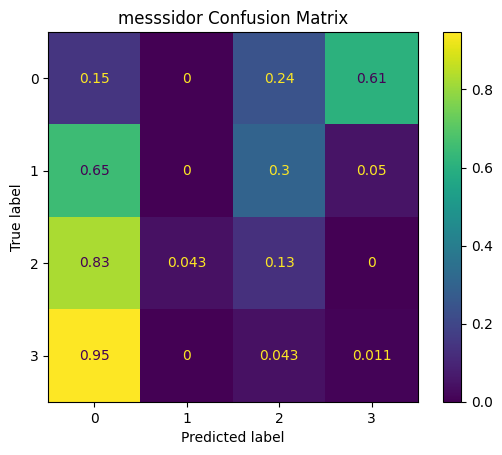

In [ ]:
my_predictions =  model_messidor.predict(testing_images_224)
print(my_predictions.shape)
classes = ['0','1','2','3']
conf_matrix = confusion_matrix(list(np.argmax(testing_labels_224, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()
plt.title("messsidor Confusion Matrix")
plt.show()

## 256

In [ ]:
model_256 = tf.keras.models.load_model('/content/gdrive/My Drive/internship/model2/m3-1.h5')

63/63 [==============================] - 1s 13ms/step
(2000, 5)


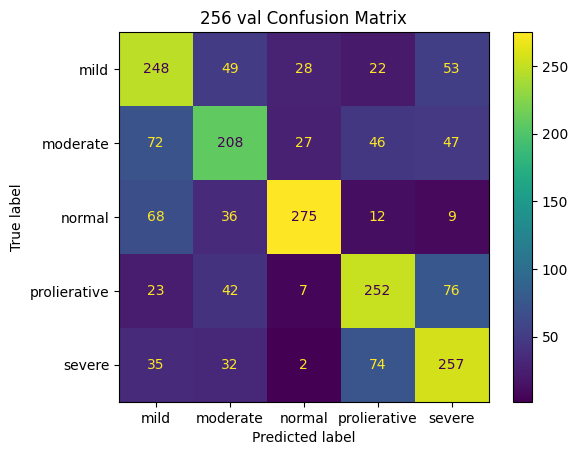

In [ ]:
my_predictions = model_256.predict(val_images_256)
print(my_predictions.shape)
classes = ['mild','moderate','normal','prolierative','severe']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(val_labels_256, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.title("256 val Confusion Matrix")
plt.show()

20/20 [==============================] - 0s 13ms/step
(624, 5)


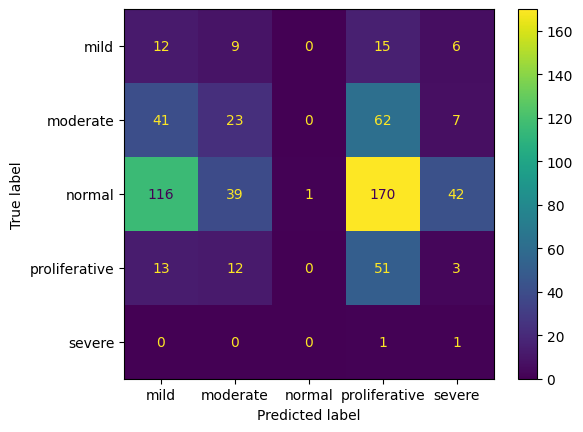

In [ ]:
my_predictions = model_256.predict(testing_images_256)
print(my_predictions.shape)
classes = ['mild','moderate','normal','proliferative','severe']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels_256, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.show()

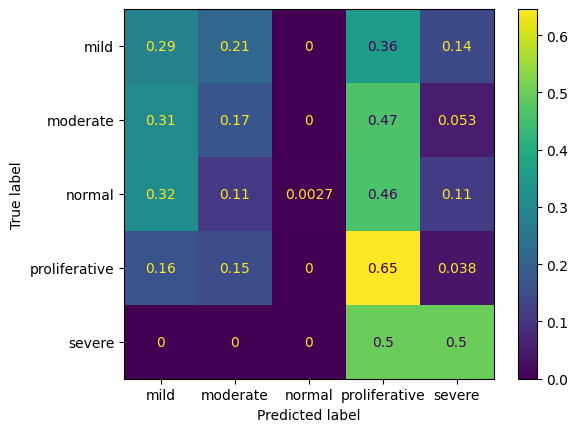

In [ ]:
conf_matrix = confusion_matrix(list(np.argmax(testing_labels_256, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()

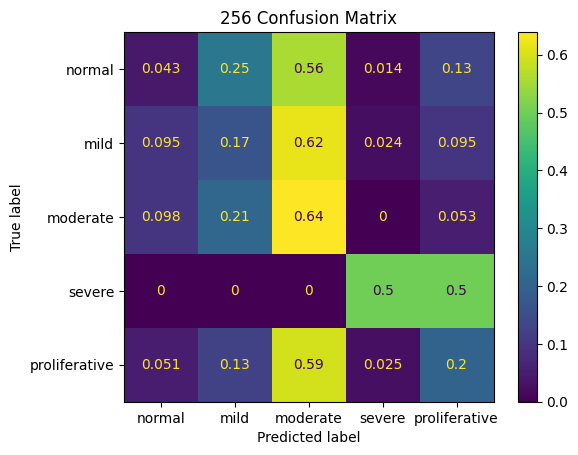

In [ ]:
# Desired order of class labels (for example, changing the order)
desired_classes_order = ['normal', 'mild', 'moderate', 'severe', 'proliferative']

# Assuming your
# Creating a confusion matrix based on the desired order of class labels
confusion = confusion_matrix(
    list(np.argmax(testing_labels_256, axis=1)),
    list(np.argmax(my_predictions, axis=1))
)

# Reordering the confusion matrix rows and columns
reordered_confusion = np.zeros_like(confusion)
for i in range(len(classes)):
    idx_i = classes.index(desired_classes_order[i])
    for j in range(len(classes)):
        idx_j = classes.index(desired_classes_order[j])
        reordered_confusion[i, j] = confusion[idx_i, idx_j]

# Normalize the confusion matrix by dividing each row by its sum
row_sums = reordered_confusion.sum(axis=1, keepdims=True)
normalized_confusion = reordered_confusion / row_sums

# Plotting the normalized confusion matrix with the desired order of class labels
cmd = ConfusionMatrixDisplay(
    normalized_confusion,
    display_labels=desired_classes_order
)
cmd.plot()  # You can change the colormap if desired
plt.title("256 Confusion Matrix")
plt.show()

# 224

In [ ]:
model_224 = tf.keras.models.load_model('/content/gdrive/My Drive/internship/model/m1-1.h5')

63/63 [==============================] - 1s 8ms/step
(2000, 5)


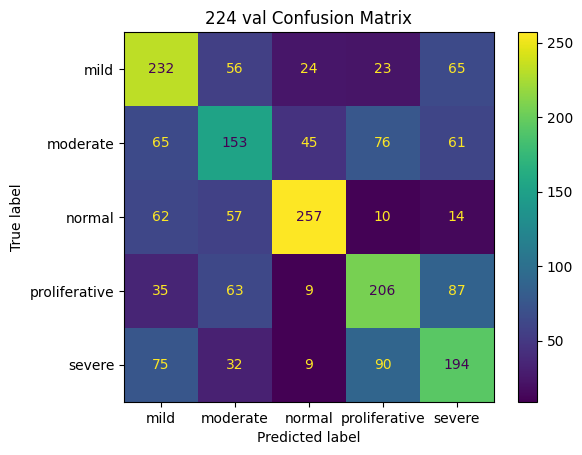

In [ ]:
my_predictions = model_224.predict(val_images_224)
print(my_predictions.shape)
classes = ['mild','moderate','normal','proliferative','severe']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(val_labels_224, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.title("224 val Confusion Matrix")
plt.show()

20/20 [==============================] - 0s 6ms/step
(624, 5)


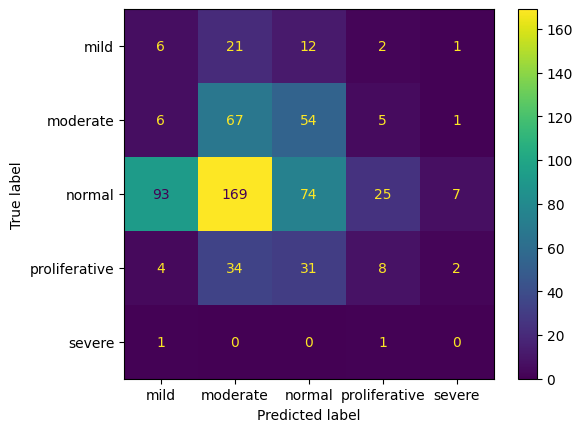

In [ ]:
my_predictions = model_224.predict(testing_images_224)
print(my_predictions.shape)
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels_224, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.show()

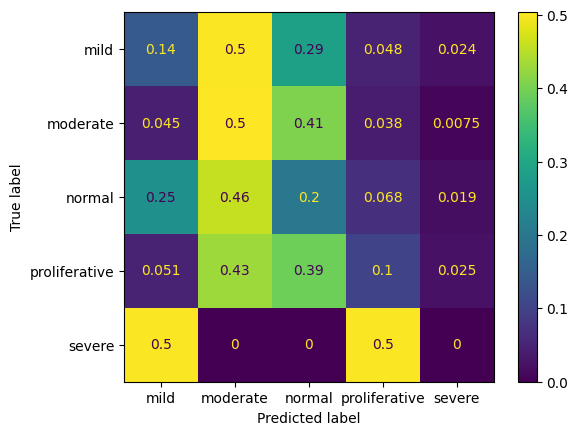

In [ ]:
conf_matrix = confusion_matrix(list(np.argmax(testing_labels_224, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()

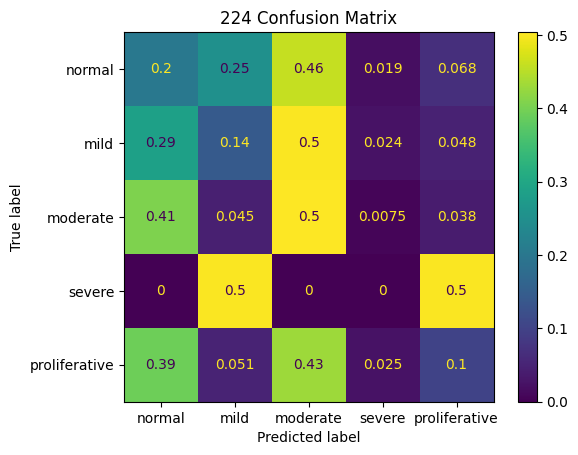

In [ ]:
# Desired order of class labels (for example, changing the order)
desired_classes_order = ['normal', 'mild', 'moderate', 'severe', 'proliferative']

# Assuming your
# Creating a confusion matrix based on the desired order of class labels
confusion = confusion_matrix(
    list(np.argmax(testing_labels_224, axis=1)),
    list(np.argmax(my_predictions, axis=1))
)

# Reordering the confusion matrix rows and columns
reordered_confusion = np.zeros_like(confusion)
for i in range(len(classes)):
    idx_i = classes.index(desired_classes_order[i])
    for j in range(len(classes)):
        idx_j = classes.index(desired_classes_order[j])
        reordered_confusion[i, j] = confusion[idx_i, idx_j]

# Normalize the confusion matrix by dividing each row by its sum
row_sums = reordered_confusion.sum(axis=1, keepdims=True)
normalized_confusion = reordered_confusion / row_sums

# Plotting the normalized confusion matrix with the desired order of class labels
cmd = ConfusionMatrixDisplay(
    normalized_confusion,
    display_labels=desired_classes_order
)
cmd.plot()  # You can change the colormap if desired
plt.title("224 Confusion Matrix")
plt.show()

## preprocessed

In [ ]:
model_prep = tf.keras.models.load_model('/content/gdrive/My Drive/internship/model_norm/m1-11.h5')

20/20 [==============================] - 1s 14ms/step
(624, 5)


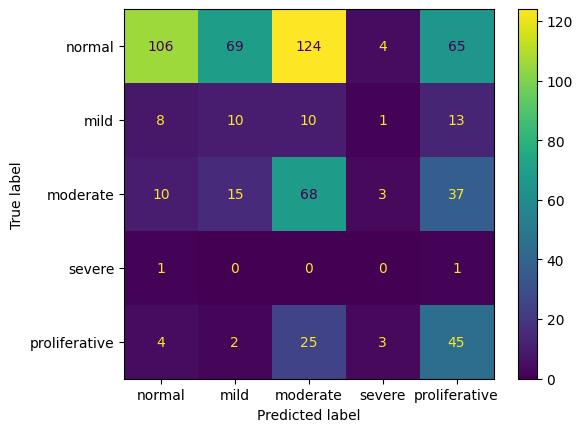

In [ ]:

my_predictions = model_prep.predict(testing_images_prep)
print(my_predictions.shape)
classes = ['normal', 'mild', 'moderate', 'severe', 'proliferative']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels_prep, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.show()

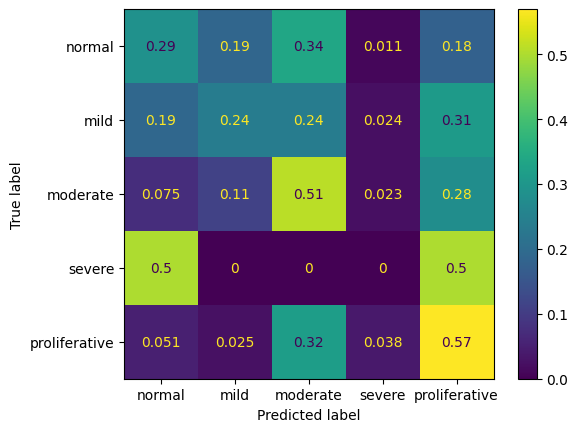

In [ ]:
conf_matrix = confusion_matrix(list(np.argmax(testing_labels_prep, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()

## 4_different

In [ ]:
testing_file_path = '/content/gdrive/My Drive/divided_imgs/arr_aptos.npy'
testing_label_path = '/content/gdrive/My Drive/divided_imgs/labels_aptos.npy'

testing_images,testing_labels=np.load(testing_file_path),np.load(testing_label_path)
print("shape of testing data",testing_images.shape,",",testing_labels.shape)
testing_images, testing_labels= shuffle(testing_images, testing_labels)

shape of testing data (732, 224, 224, 3) , (732, 5)


23/23 [==============================] - 1s 22ms/step
(732, 5)


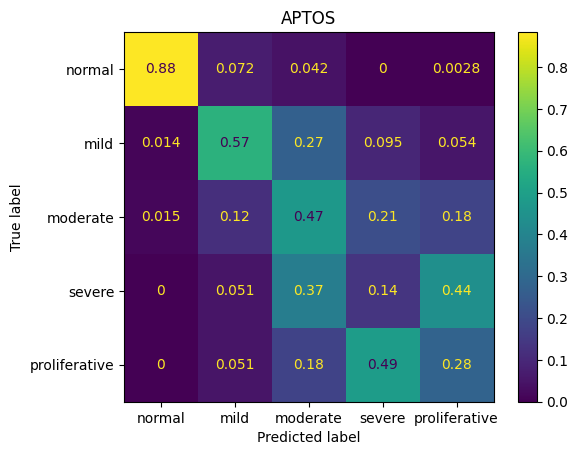

In [ ]:
my_predictions = model_prep.predict(testing_images)
print(my_predictions.shape)
classes = ['normal', 'mild', 'moderate', 'severe', 'proliferative']
conf_matrix = confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()
plt.title('APTOS')
plt.show()

In [ ]:
testing_file_path = '/content/gdrive/My Drive/divided_imgs/arr_ddr.npy'
testing_label_path = '/content/gdrive/My Drive/divided_imgs/labels_ddr.npy'

testing_images,testing_labels=np.load(testing_file_path),np.load(testing_label_path)
print("shape of testing data",testing_images.shape,",",testing_labels.shape)
testing_images, testing_labels= shuffle(testing_images, testing_labels)

shape of testing data (2507, 224, 224, 3) , (2507, 5)


79/79 [==============================] - 1s 9ms/step
(2507, 5)


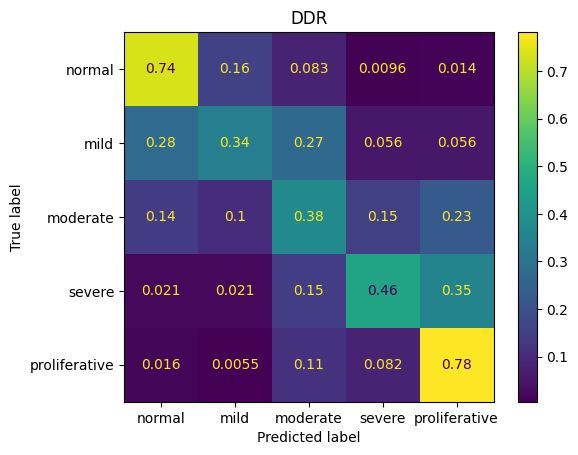

In [ ]:
my_predictions = model_prep.predict(testing_images)
print(my_predictions.shape)
classes = ['normal', 'mild', 'moderate', 'severe', 'proliferative']
conf_matrix = confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()
plt.title('DDR')
plt.show()

In [ ]:
testing_file_path = '/content/gdrive/My Drive/divided_imgs/arr_eyepacs.npy'
testing_label_path = '/content/gdrive/My Drive/divided_imgs/labels_eyepacs.npy'

testing_images,testing_labels=np.load(testing_file_path),np.load(testing_label_path)
print("shape of testing data",testing_images.shape,",",testing_labels.shape)
testing_images, testing_labels= shuffle(testing_images, testing_labels)

shape of testing data (1983, 224, 224, 3) , (1983, 5)


62/62 [==============================] - 1s 10ms/step
(1983, 5)


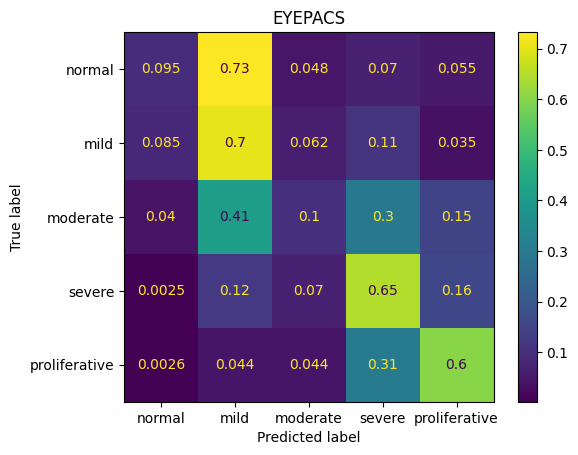

In [ ]:
my_predictions = model_prep.predict(testing_images)
print(my_predictions.shape)
classes = ['normal', 'mild', 'moderate', 'severe', 'proliferative']
conf_matrix = confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()
plt.title('EYEPACS')
plt.show()

In [ ]:
testing_file_path = '/content/gdrive/My Drive/divided_imgs/arr_idrid.npy'
testing_label_path = '/content/gdrive/My Drive/divided_imgs/labels_idrid.npy'

testing_images,testing_labels=np.load(testing_file_path),np.load(testing_label_path)
print("shape of testing data",testing_images.shape,",",testing_labels.shape)
testing_images, testing_labels= shuffle(testing_images, testing_labels)

shape of testing data (105, 224, 224, 3) , (105, 5)


4/4 [==============================] - 0s 64ms/step
(105, 5)


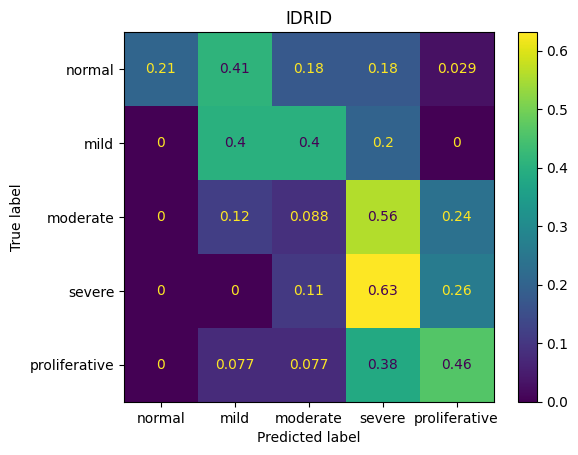

In [ ]:

my_predictions = model_prep.predict(testing_images)
print(my_predictions.shape)
classes = ['normal', 'mild', 'moderate', 'severe', 'proliferative']
conf_matrix = confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=classes)
cmd.plot()
plt.title('IDRID')
plt.show()